### Example for loading SDSS spectrum using info from the training set

You need to install urllib3 and specutils from the terminal, somehow installing using ipython magic within the notebook doesn't install them to the correct conda env

In [4]:
# import training set packages
import pandas as pd
import numpy as np
import zarr
from utils import *
pd.set_option('display.max_columns', 999)

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# init training set connection
init()

In [5]:
# import spectuls related
import astropy.units as u

import specutils
from specutils import Spectrum1D
specutils.__version__

# for showing quantity units on axes automatically:
from astropy.visualization import quantity_support
quantity_support();

In [6]:
# get qso training set
qso_df = get_qso_cat()
qso_df.head()

,train_id,ra,dec,spec_plate,spec_mjd,spec_fiberid,is_qso_final,z,source_z,specobjid,sdss_objid,psfmagerr_u,psfmagerr_g,psfmagerr_r,psfmagerr_i,psfmagerr_z,psfmag_u,psfmag_g,psfmag_r,psfmag_i,psfmag_z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,dered_u,dered_g,dered_r,dered_i,dered_z,type,run,src2photo,src2gaia,gaia_id,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,spies_id,spies_ra,spies_dec,flux_auto_ch1,fluxerr_auto_ch1,class_star_ch1,flux_auto_ch2,fluxerr_auto_ch2,class_star_ch2,src2spies,ukidss_id,ay,aj,ah,ak,yapermag3,yapermag3err,japermag3,japermag3err,hapermag3,hapermag3err,kapermag3,kapermag3err,ukidss_pstar,ukidss_pgalaxy,src2ukidss,galex_id,fuv_mag,fuv_magerr,nuv_mag,nuv_magerr,src2galex,mpstype,psPm[0],psPm[1],psParallax,stdColor[0],stdColor[1],stdColor[2],stdColor[3],psFlux[u],psFlux[g],psFlux[r],psFlux[i],psFlux[z],class,gal_subclass,s82LSST,s82SDSS,sdss_lcN
0,0,309.2164,0.516741,1117,52885.0,356,1,1.641482,DR6Q_HW,1.257728e+18,8647474692728161280,0.031342,0.011038,0.014122,0.015842,0.048335,20.32299,20.16837,20.07710,19.77096,19.69925,0.381036,0.280362,0.203342,0.154188,0.109321,19.94195,19.88801,19.87376,19.61677,19.58993,6,106,0.072612,0.039874,4231211839387175424,1.231243,1.208207,-0.665619,3.160284,1.479964,1.664234,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433796596990,0.089510,0.065709,0.042722,0.026609,19.325617,0.098304,18.882778,0.115129,18.259062,0.178485,17.800070,0.148309,5.262303e-02,0.947215,0.257996,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,-0.665619,1.479964,1.231243,0.05394,0.01425,0.25699,0.02684,25982.198589,26962.891720,33815.371339,44828.061729,48635.957944,s82Qso,None,1,1,54
1,1,309.2194,-0.479245,1117,52885.0,304,1,0.930411,DR6Q_HW,1.257714e+18,8647475120614278144,0.024440,0.006830,0.007038,0.010528,0.030004,20.74151,20.39063,20.12772,20.14267,19.90907,0.685644,0.504490,0.365898,0.277450,0.196715,20.05587,19.88614,19.76183,19.86522,19.71235,6,206,0.050114,0.059315,4226575164493552128,-0.019745,0.554584,-0.513296,0.941636,0.313089,0.679704,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433863658375,0.147035,0.107939,0.070178,0.043710,18.807596,0.060388,17.898998,0.048343,17.426260,0.063209,16.787697,0.054704,5.262303e-02,0.947215,0.149148,6379430435810709504,NaN,NaN,21.093075,0.240537,1.100549,1,-0.513296,0.313089,-0.019745,0.16973,0.12431,-0.10339,0.15287,17663.977528,18335.145244,32274.469694,31825.497722,40029.683101,s82Qso,None,1,1,59
2,2,309.2220,-0.160658,1117,52885.0,302,1,1.775506,DR6Q_HW,1.257713e+18,8647475121151149056,0.014701,0.005218,0.006074,0.006600,0.023517,20.22258,20.10596,19.98231,19.65110,19.64488,0.483065,0.355435,0.257791,0.195475,0.138594,19.73952,19.75052,19.72452,19.45563,19.50629,6,206,0.023886,0.065399,4226625226631362560,-0.400886,0.740825,-0.196442,2.120447,-2.177161,1.401930,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433841002105,0.113455,0.083288,0.054151,0.033727,19.169900,0.102561,18.693764,0.095908,18.334024,0.177777,17.441616,0.108151,1.714368e-04,0.999819,0.056143,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,-0.196442,-2.177161,-0.400886,-0.01100,0.02600,0.26889,-0.05066,28501.385092,29576.122657,36901.303832,50062.466916,51148.877388,s82Qso,None,1,1,49
3,3,309.2296,0.171063,1117,52885.0,354,1,1.110641,DR6Q_HW,1.257728e+18,8647474692191290368,0.018865,0.006770,0.008106,0.011149,0.050139,19.44578,19.42037,19.31383,19.41686,19.44050,0.426967,0.314159,0.227854,0.172775,0.122499,19.01881,19.10621,19.08597,19.24408,19.31800,6,106,0.073788,0.020377,4231137828510030336,0.975206,0.943810,1.561449,2.184165,2.870286,2.162752,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,433816504832,0.100299,0.073630,0.047872,0.029816,19.053074,0.107903,19.285357,0.198457,18.067146,0.156423,17.129730,0.093723,9.472145e-01,0.052623,0.248786,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,1.561449,2.870286,0.975206,-0.08740,0.02024,-0.15811,-0.07392,58302.017211,60492.505873,68308.787979,62120.391275,61798.356728,s82Qso,None,1,1,50
4,4,309.2387,0.028991,1117,52885.0,301,1,0.442569,DR6Q_HW,1.257713e+18,864747469

In [20]:
# spec url
from urllib.request import urlretrieve
dr16_temp = "https://dr16.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid={}&mjd={}&fiberid={}"

In [21]:
# get data from SDSS database
obj = qso_df.iloc[0]
url = dr16_temp.format(obj.spec_plate, int(obj.spec_mjd), obj.spec_fiberid)
urlretrieve(url, 'data/sdss_spectrum.fits')

('data/sdss_spectrum.fits', <http.client.HTTPMessage at 0x7f74a3ab6fd0>)

Text(0.5, 1.0, 'plateid: 1117, mjd: 52885.0, fiberid:356')

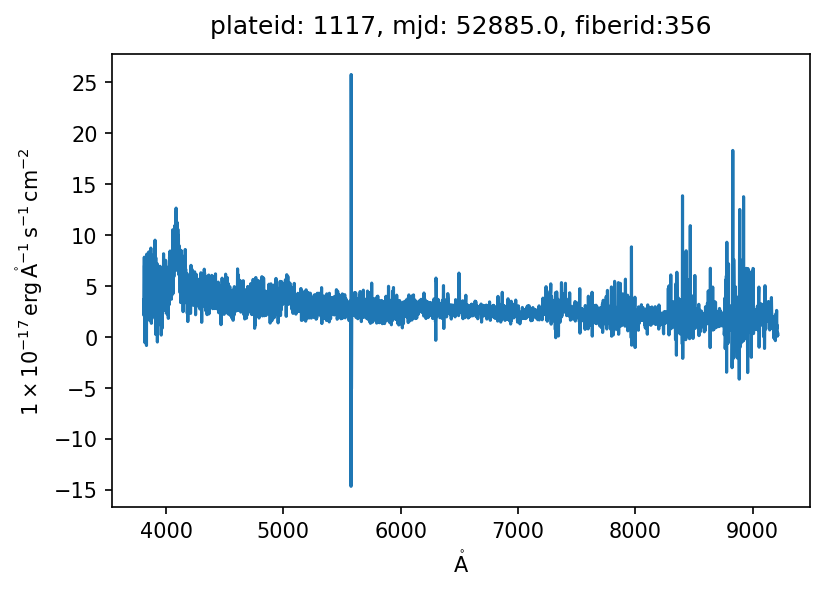

In [29]:
# read in the spec and plot
sdss_spec = Spectrum1D.read('data/sdss_spectrum.fits', format='SDSS-III/IV spec')

# plot
fig = plt.figure(dpi=150)
_ = plt.plot(sdss_spec.wavelength, sdss_spec.flux)
plt.title(f'plateid: {obj.spec_plate}, mjd: {obj.spec_mjd}, fiberid:{obj.spec_fiberid}')